In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



In [2]:

df = pd.read_csv(r"C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# This time my target Column is Estimated Salary

In [3]:

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:


# so here also droping the some waste column 

df.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

In [6]:

# this is my updated columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


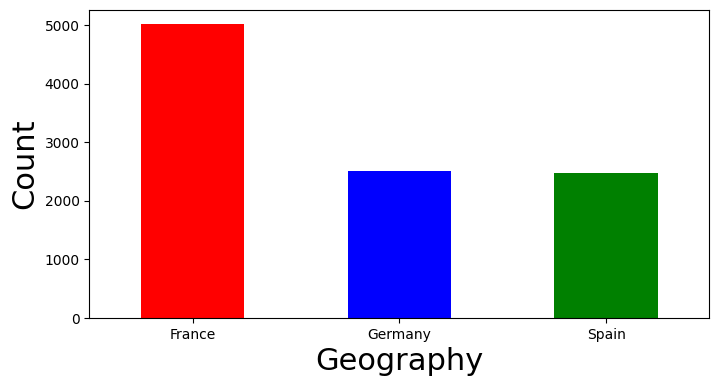

In [7]:

# Geography
plt.figure(figsize=(8,4))
df['Geography'].value_counts().plot(kind='bar',color=['red','blue','green'])
plt.xticks(rotation='horizontal')
plt.xlabel('Geography',size=22)
plt.ylabel('Count',size=22)
plt.show()


C:\Users\iamda\AppData\Local\Temp\ipykernel_11952\1134999481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Geography',y='EstimatedSalary',data=geo_estimated,palette=['blue','green','orange'])


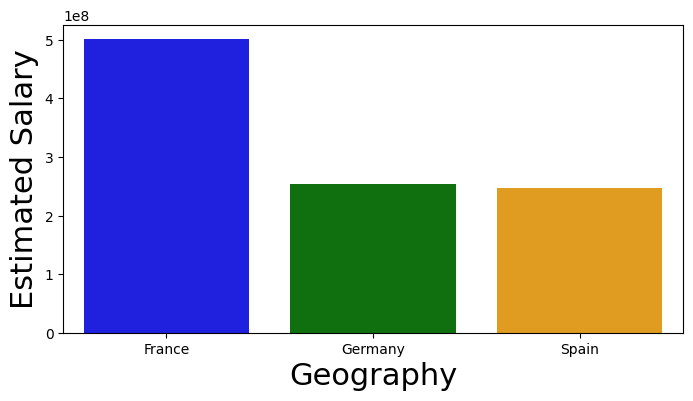

In [8]:

# Checking the how much relation between the estimates salary
plt.figure(figsize=(8,4))
geo_estimated = df.groupby(['Geography'])['EstimatedSalary'].sum().to_frame()
sns.barplot(x='Geography',y='EstimatedSalary',data=geo_estimated,palette=['blue','green','orange'])
plt.xlabel('Geography',size=22)
plt.ylabel('Estimated Salary',size=22)
plt.show()

<Figure size 1000x800 with 0 Axes>

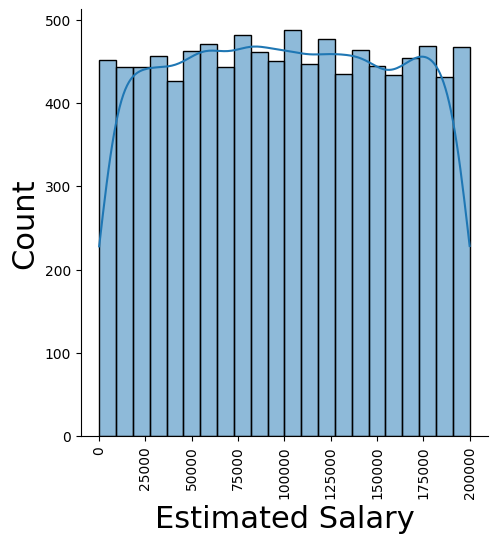

In [9]:

plt.figure(figsize=(10,8))
sns.displot(df['EstimatedSalary'],kde=True)
plt.xlabel('Estimated Salary',size=22)
plt.ylabel('Count',size=22)
plt.xticks(rotation='vertical')
plt.show()

In [10]:

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:

df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

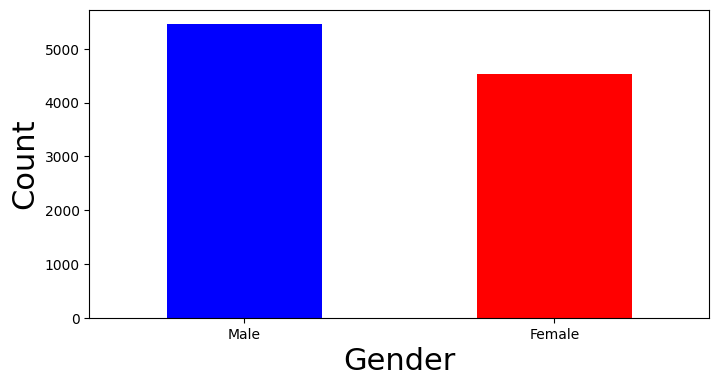

In [12]:

plt.figure(figsize=(8,4))
df['Gender'].value_counts().plot(kind='bar',color=['blue','red'])
plt.xlabel('Gender',size=22)
plt.ylabel('Count',size=22)
plt.xticks(rotation='horizontal')
plt.show()

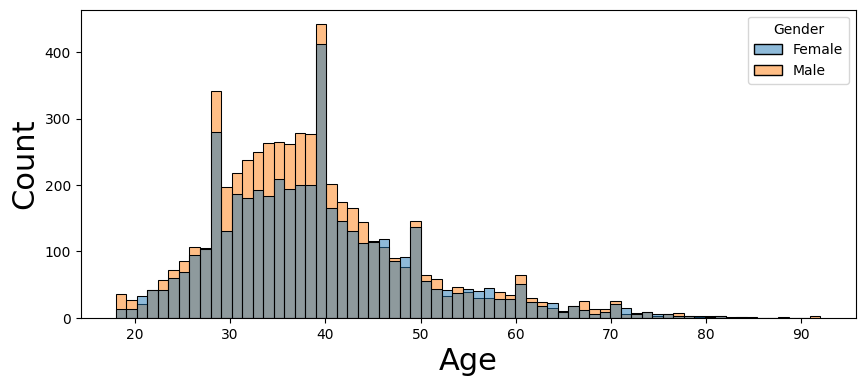

In [13]:

# Age column
plt.figure(figsize=(10,4))
sns.histplot(x='Age',data=df,hue='Gender')
plt.xlabel('Age',size=22)
plt.ylabel('Count',size=22)
plt.show()


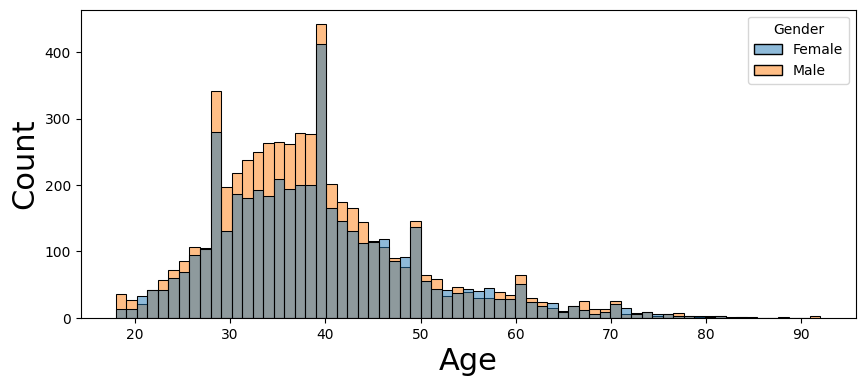

In [14]:

plt.figure(figsize=(10,4))
#age_estimated = df.groupby(['Age'])['EstimatedSalary'].sum().to_frame()
sns.histplot(x='Age',hue='Gender',data=df)
plt.xlabel('Age',size=22)
plt.ylabel('Count',size=22)
plt.show()

# Now come on buliding the model

In [15]:

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:

# converting the Geography column with help of OneHotEncoder
ohe = OneHotEncoder()
geo_vector = ohe.fit_transform(df[['Geography']]).toarray()
geo_vector



array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [17]:
# Converting in the dataframe
geo_vector_df = pd.DataFrame(geo_vector,columns=ohe.get_feature_names_out())
geo_vector_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [18]:

# Now converting the Gender column into numerical with help of LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df[['Gender']])
df['Gender']

c:\Users\iamda\OneDrive\Desktop\try1\venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [19]:

# Now save both the steps

# OneHotEncoder
with open('ohe_reg.pkl','wb') as file:
    pickle.dump(ohe,file)

# labelEncoder
with open('le.pkl','wb') as file:
    pickle.dump(le,file)


In [20]:

final_df = pd.concat([df.drop(['Geography'],axis=1),geo_vector_df],axis=1)
final_df


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [21]:

final_df.describe()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [22]:

final_df[final_df['Balance']>220898.090000]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2092,655,1,38,3,250898.09,3,0,1,81054.00,1,0.0,0.0,1.0
3280,583,0,57,3,238387.56,1,0,1,147964.99,1,1.0,0.0,0.0
3588,489,1,40,3,221532.80,1,1,0,171867.08,0,0.0,0.0,1.0
8733,749,1,42,9,222267.63,1,0,0,101108.85,1,0.0,0.0,1.0


In [23]:

# perform the train and split
X=final_df.drop(['EstimatedSalary'],axis=1)
y=final_df['EstimatedSalary']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [24]:

# Now standardise the data
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler


array([[ 0.72682704,  0.91025899,  0.19876101, ...,  0.99128795,
        -0.57792762, -0.57003687],
       [ 0.932858  , -1.09858844, -0.2771138 , ...,  0.99128795,
        -0.57792762, -0.57003687],
       [-0.72569129,  0.91025899,  1.05533567, ...,  0.99128795,
        -0.57792762, -0.57003687],
       ...,
       [-1.27167336, -1.09858844, -0.65781365, ...,  0.99128795,
        -0.57792762, -0.57003687],
       [-1.302578  ,  0.91025899,  0.4842859 , ...,  0.99128795,
        -0.57792762, -0.57003687],
       [ 0.80923942,  0.91025899, -1.22886342, ..., -1.00878862,
         1.73032049, -0.57003687]])

In [41]:
with open('scaler_reg.pkl','wb') as file:
    pickle.dump(scaler,file)

In [30]:

from tensorflow.keras.callbacks import EarlyStopping

# now making the ann model
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=x_train_scaler.shape[1]))
model.add(Dense(120,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(480,activation='relu'))

# output layer
model.add(Dense(1,activation='linear'))

# earlystopping
early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# compile
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=['mae'])
# fit
history = model.fit(x_train_scaler,y_train,epochs=25,validation_data=(x_test_scaler,y_test),callbacks=early)

history 
      

c:\Users\iamda\OneDrive\Desktop\try1\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 81083.8750 - mae: 81083.8750 - val_loss: 50122.0664 - val_mae: 50122.0664
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49931.2305 - mae: 49931.2305 - val_loss: 50393.3086 - val_mae: 50393.3086
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49839.7031 - mae: 49839.7031 - val_loss: 50271.0586 - val_mae: 50271.0586
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49688.6758 - mae: 49688.6758 - val_loss: 50025.4023 - val_mae: 50025.4023
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49418.6445 - mae: 49418.6445 - val_loss: 50012.5742 - val_mae: 50012.5742
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49575.2656 - mae: 49575.2656 - val_loss: 50052.1172 - val_mae: 50052.1172
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49678.0820 - mae: 49678.0820 - val_loss: 50063.8086 - val_mae: 50063.8086
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49

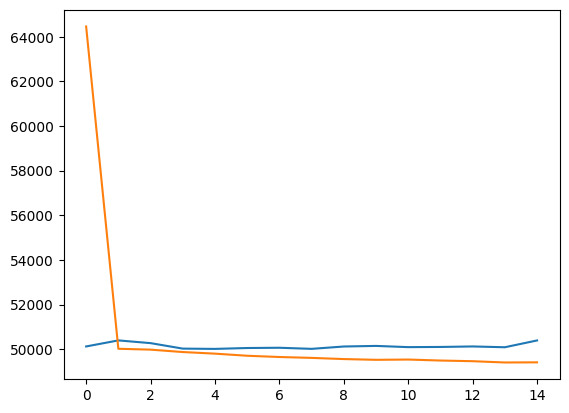

In [31]:

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

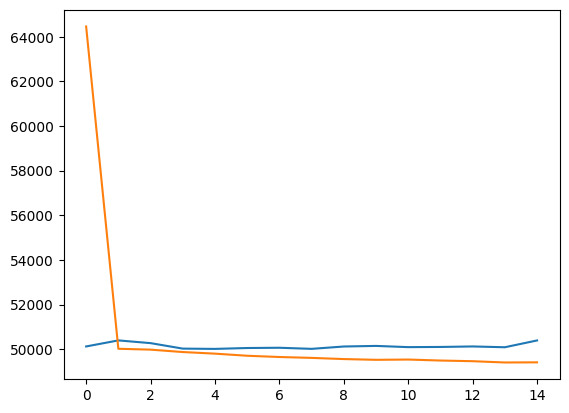

In [32]:

plt.plot(history.history['val_mae'])
plt.plot(history.history['mae'])


In [36]:

test_mae,val_mae = model.evaluate(x_test_scaler,y_test)
print(f'Test MAE: {test_mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50068.9375 - mae: 50068.9375
Test MAE: 50012.57421875


In [37]:

model.save('model_reg.h5')

In [ ]:
ohe.categories_

'F'